In [1]:
import numpy as np
import cv2
from PIL import Image
import grabcut as g
import torch
from torchvision import transforms

import sys
sys.path.append('../')
import utils.image as im
import utils.cam as cam

In [2]:
img = cv2.imread('cat.jpg')
preprocess = transforms.Compose([
   transforms.ToTensor()])
img_pil = preprocess(Image.open('cat.jpg'))

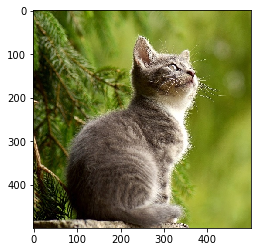

In [3]:
im.show(im.rgb_swap_bgr(img))

In [4]:
camnet = cam.Cam()

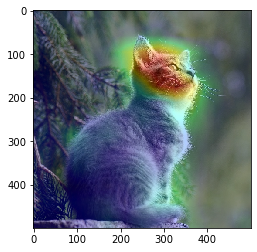

In [14]:
_, _, img_cam = camnet.get_top_voc_to_imagenet(img_pil, 'cat')
img_cam = cam.cam_process(img_pil, img_cam)

img_heat = cam.heat_map(img, img_cam, 0.3, 0.7)

im.show(im.rgb_swap_bgr(img_heat))

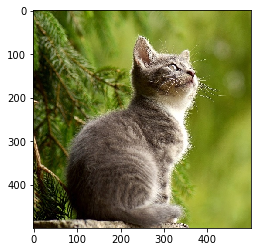

In [8]:
im.show(im.rgb_swap_bgr(img))

In [9]:
BLUE = [255, 0, 0]        # rectangle color
RED = [0, 0, 255]         # PR BG
GREEN = [0, 255, 0]       # PR FG
BLACK = [0, 0, 0]         # sure BG
WHITE = [255, 255, 255]   # sure FG

DRAW_BG = {'color': BLACK, 'val': 0}
DRAW_FG = {'color': WHITE, 'val': 1}
DRAW_PR_FG = {'color': GREEN, 'val': 3}
DRAW_PR_BG = {'color': RED, 'val': 2}

rect = (0, 0, 1, 1)
drawing = False         # flag for drawing curves
rectangle = False       # flag for drawing rect
rect_over = False       # flag to check if rect drawn
rect_or_mask = 100      # flag for selecting rect or mask mode
value = DRAW_PR_FG
thickness = 3           # brush thickness
skip_learn_GMMs = False # whether to skip learning GMM parameters

(pr_)bgd count: 70000, (pr_)fgd count: 180000
Beta: 0.0013254829285791034
skip learn GMMs: False
<class 'numpy.ndarray'>
250000
[0 1 2 3 4] [0 1 2 3 4]
500
(500, 500)
[0 1 2 3 4]


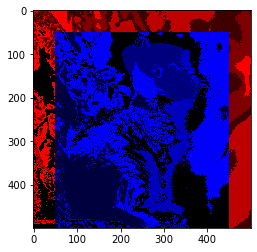

bgd count: 70000, fgd count: 0, uncertain count: 180000
foreground pixels: 120043, background pixels: 129959
(pr_)bgd count: 129958, (pr_)fgd count: 120042
skip learn GMMs: False
<class 'numpy.ndarray'>
250000
[0 1 2 3 4] [0 1 2 3 4]
500
(500, 500)
[0 1 2 3 4]


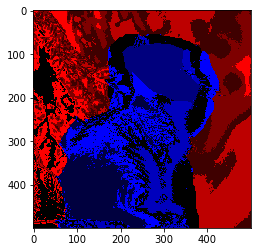

bgd count: 70000, fgd count: 0, uncertain count: 180000
foreground pixels: 116606, background pixels: 133396
(pr_)bgd count: 133395, (pr_)fgd count: 116605


In [15]:
img2 = img_heat.copy()                           # a copy of original image
mask = np.zeros(img.shape[:2], dtype=np.uint8)   # mask initialized to PR_BG
output = np.zeros(img.shape, np.uint8)           # output image to be shown
rect = (50, 50, 400, 450)

gc = g.GrabCut(img2, mask, rect)
gc.run(skip_learn_GMMs=False)
rect_or_mask = 1

mask2 = np.where((mask == 1) + (mask == 3), 255, 0).astype('uint8')
output = cv2.bitwise_and(img, img, mask=mask2)

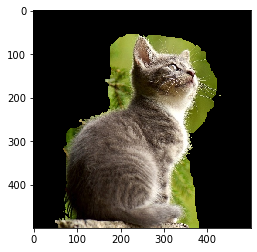

In [16]:
im.show(im.rgb_swap_bgr(output))

(pr_)bgd count: 70000, (pr_)fgd count: 180000
Beta: 0.0006529197648209467
skip learn GMMs: False
<class 'numpy.ndarray'>
250000
[0 1 2 3 4] [0 1 2 3 4]
500
(500, 500)
[0 1 2 3 4]


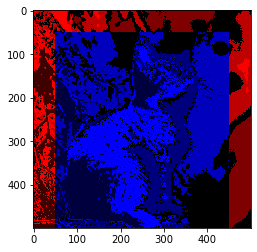

bgd count: 70000, fgd count: 0, uncertain count: 180000
foreground pixels: 89592, background pixels: 160410
(pr_)bgd count: 160409, (pr_)fgd count: 89591
skip learn GMMs: False
<class 'numpy.ndarray'>
250000
[0 1 2 3 4] [0 1 2 3 4]
500
(500, 500)
[0 1 2 3 4]


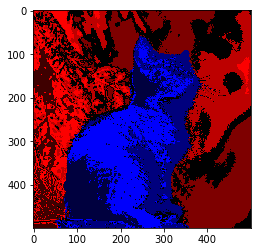

bgd count: 70000, fgd count: 0, uncertain count: 180000
foreground pixels: 88194, background pixels: 161808
(pr_)bgd count: 161807, (pr_)fgd count: 88193


In [12]:
mask = np.zeros(img.shape[:2], dtype=np.uint8)   # mask initialized to PR_BG
output = np.zeros(img.shape, np.uint8)           # output image to be shown
rect = (50, 50, 400, 450)

gc = g.GrabCut(img, mask, rect)
gc.run(skip_learn_GMMs=False)
rect_or_mask = 1

mask2 = np.where((mask == 1) + (mask == 3), 255, 0).astype('uint8')
output = cv2.bitwise_and(img, img, mask=mask2)

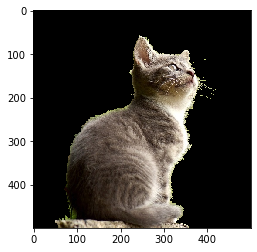

In [13]:
im.show(im.rgb_swap_bgr(output))